In [81]:
import pandas as pd

# First, let's load the CSV file to check its structure before plotting the histogram
csv_file_path = 'E:\\CLS\\FinancialNetwork\\Real data\\bankrupt1970-2010.CSV'
bankruptcy_data = pd.read_csv(csv_file_path)

# Display the first few rows to understand the structure of the data
bankruptcy_data.head()

,1970,0
0,1971,0
1,1972,0
2,1973,0
3,1974,0
4,1975,0


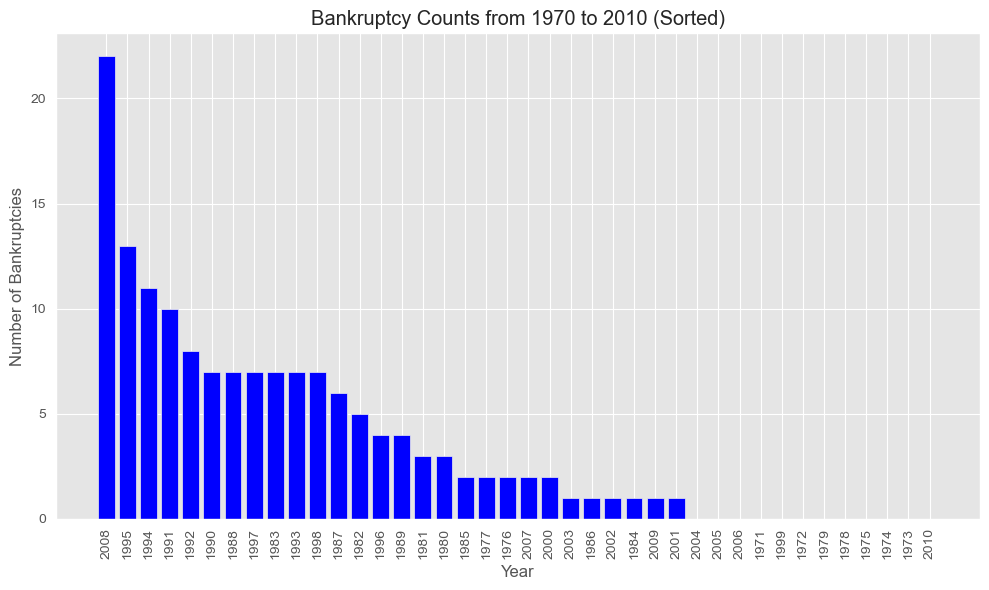

In [82]:
import matplotlib.pyplot as plt

# Since the structure of the CSV is now understood, let's plot the histogram.
# The first column appears to be the year and the second the count of bankruptcies.

sorted_data = bankruptcy_data.sort_values(by=bankruptcy_data.columns[1], ascending=False)

# Set the style for better visibility
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.bar(sorted_data.iloc[:, 0].astype(str), sorted_data.iloc[:, 1], color='blue')

# Add titles and labels
plt.title('Bankruptcy Counts from 1970 to 2010 (Sorted)')
plt.xlabel('Year')
plt.ylabel('Number of Bankruptcies')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout to fit the x-axis labels
plt.show()

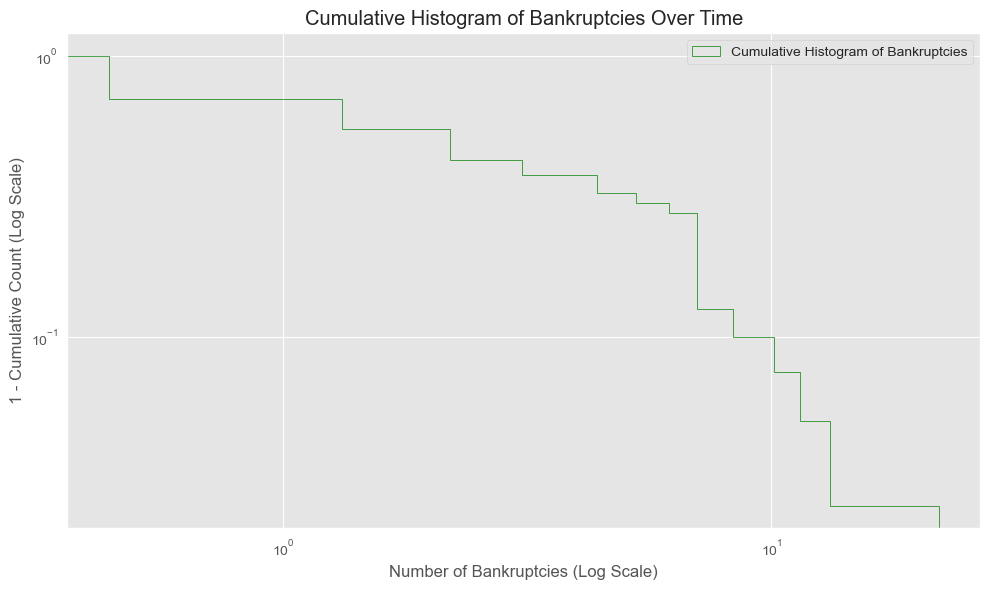

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(sorted_data.iloc[:, 1], bins=50, cumulative=-1, log=True, color='green', label='Cumulative Histogram of Bankruptcies', histtype='step', density=True)
plt.xscale('log')
plt.xlabel('Number of Bankruptcies (Log Scale)')
plt.ylabel('1 - Cumulative Count (Log Scale)')
plt.title('Cumulative Histogram of Bankruptcies Over Time')
plt.legend()

plt.tight_layout()  # Adjust the layout
plt.show()

In [84]:
import os


def get_files_with_parameters(directory_path, input_parameters):
    # Read all files in the directory
    
    all_files = os.listdir(directory_path)
    print('all files in directory: ', all_files)

    # List to hold DataFrames of files that match the input parameters
    matching_files_data = []

    for filename in all_files:
        # Split the filename on the first underscore to drop the initial number sequence
        parts = filename.split('_', 1)
        if len(parts) == 2:
            # Split the parameters part on the last underscore to drop the timestamp
            prefix, parameters_with_timestamp = parts
            parameters = '_'.join(parameters_with_timestamp.split('_')[:-1])
            
            # Check if the file parameters match the input parameters
            if input_parameters in parameters:
                # Construct the full path to the file
                file_path = os.path.join(directory_path, filename)
                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)
                # Add the DataFrame to the list
                matching_files_data.append(df)

    return matching_files_data

def select_variable_given_list_of_dfs(selected_dfs: list, variable_name: str):
    # List to hold lists of the selected variable from each DataFrame
    list_of_lists = []

    for df in selected_dfs:
        # Check if the variable_name column exists to avoid KeyError
        if variable_name in df.columns:
            # Extract the variable column
            variable_data = df[variable_name]
            
            # Convert each item in the column to a list of floats
            for item in variable_data:
                if isinstance(item, str):  # If item is a string, convert from string representation
                    floats_list = convert_string_representation_to_list(item)
                elif isinstance(item, list):  # If item is already a list, use it as is
                    floats_list = item
                elif isinstance(item, float) or isinstance(item, int):  # If item is a number, place it in a list
                    floats_list = [item]
                else:
                    raise TypeError(f"Unexpected type for '{variable_name}': {type(item)}")
                list_of_lists.append(floats_list)
        else:
            print(f"The variable '{variable_name}' is not in the DataFrame.")

    return list_of_lists

def convert_string_representation_to_list(item):
    if isinstance(item, str):
        # Remove the square brackets and split the string on commas
        clean_string = item.strip('[]')
        # Split the string on commas and convert each part to float
        return [float(s) for s in clean_string.split(',')]
    elif isinstance(item, float) or isinstance(item, int):
        # If the item is a number, return it in a list
        return [item]
    else:
        # If the item is a list, assume it is already in the correct format
        return item

def adjust_bankrupt_agents(num_bankrupt_agents, diff_bankrupt_agents):
    # Assumes num_bankrupt_agents and diff_bankrupt_agents are lists of floats
    return [num_bankrupt_agents[0]] + diff_bankrupt_agents[:-1]

In [85]:
path = R'E:\CLS\FinancialNetwork\Real data\data'

input_parameters_model = 'divide exposure singly_intrest_rate'
input_parameters_paper = 'random link logic_exposure'

selected_files_model = get_files_with_parameters(path, input_parameters_model)
selected_files_paper = get_files_with_parameters(path, input_parameters_paper)

data_plot_2_our_model_diff_agents = select_variable_given_list_of_dfs(selected_files_model, 'Abs Difference of Bankrupt Agents Over Time')
data_plot_2_paper_diff_agents = select_variable_given_list_of_dfs(selected_files_paper, 'Abs Difference of Bankrupt Agents Over Time')
data_plot_2_our_model_num_agents = select_variable_given_list_of_dfs(selected_files_model, 'Number of Bankrupt Agents Over Time')
data_plot_2_paper_num_agents = select_variable_given_list_of_dfs(selected_files_paper, 'Number of Bankrupt Agents Over Time')

adjusted_model_data = []
for num_agents_series, diff_agents_series in zip(data_plot_2_our_model_num_agents, data_plot_2_our_model_diff_agents):
    # Convert each item in the Series of strings into a list of floats
    list_of_num_lists = [convert_string_representation_to_list(num_str) for num_str in num_agents_series]
    list_of_diff_lists = [convert_string_representation_to_list(diff_str) for diff_str in diff_agents_series]
    
    # Combine the lists of numbers and differences into adjusted data
    for num_list, diff_list in zip(list_of_num_lists, list_of_diff_lists):
        adjusted_data = adjust_bankrupt_agents(num_list, diff_list)
        adjusted_model_data.extend(adjusted_data)  # Use extend to add items to the flat list

adjusted_paper_data = []
for num_agents_series, diff_agents_series in zip(data_plot_2_paper_num_agents, data_plot_2_paper_diff_agents):
    # Convert each item in the Series of strings into a list of floats
    list_of_num_lists = [convert_string_representation_to_list(num_str) for num_str in num_agents_series]
    list_of_diff_lists = [convert_string_representation_to_list(diff_str) for diff_str in diff_agents_series]
    
    # Combine the lists of numbers and differences into adjusted data
    for num_list, diff_list in zip(list_of_num_lists, list_of_diff_lists):
        adjusted_data = adjust_bankrupt_agents(num_list, diff_list)
        adjusted_paper_data.extend(adjusted_data)  # Use extend to add items to the flat list

all files in directory:  ['300_2000_1_1_3.5699004438176827_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201165538.csv', '300_2000_1_3.5699004438176827_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201160408.csv']
all files in directory:  ['300_2000_1_1_3.5699004438176827_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201165538.csv', '300_2000_1_3.5699004438176827_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201160408.csv']


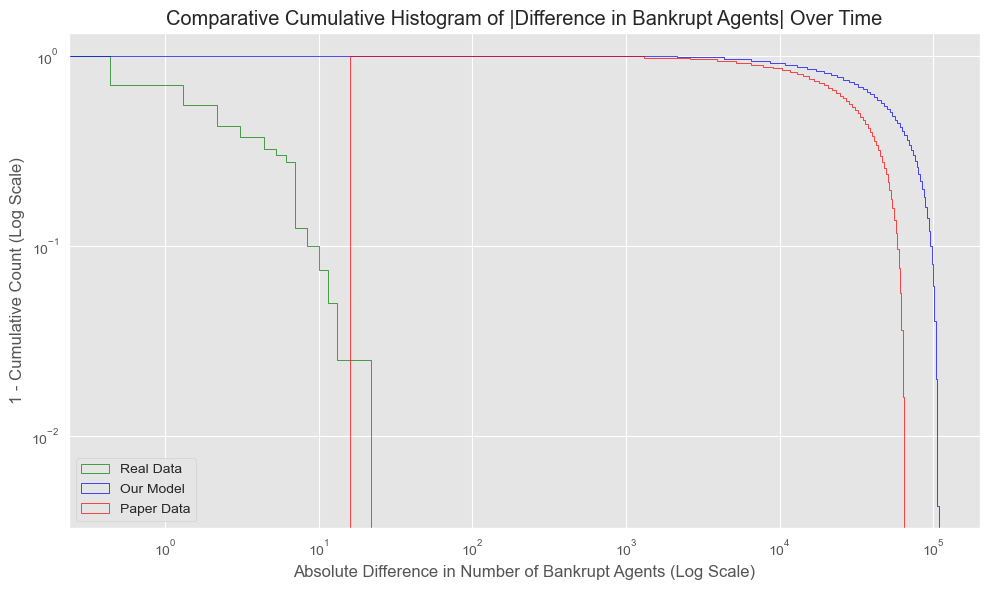

In [86]:
import numpy as np

# Plot the real data cumulative histogram
plt.figure(figsize=(10, 6))
plt.hist(sorted_data[bankruptcy_data.columns[1]], bins=50, cumulative=-1, log=True, color='green', label='Real Data', histtype='step', density=True)

# Plot the model data cumulative histogram
plt.hist(np.abs(adjusted_model_data), bins=50, cumulative=-1, log=True, color='blue', label='Our Model', histtype='step', density=True)

# Plot the paper data cumulative histogram
plt.hist(np.abs(adjusted_paper_data), bins=50, cumulative=-1, log=True, color='red', label='Paper Data', histtype='step', density=True)

# Add labels and title
plt.xscale('log')
plt.xlabel('Absolute Difference in Number of Bankrupt Agents (Log Scale)')
plt.ylabel('1 - Cumulative Count (Log Scale)')
plt.title('Comparative Cumulative Histogram of |Difference in Bankrupt Agents| Over Time')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()